In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. Сгенерируйте массив из 500 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 2x - 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$

In [2]:
f = lambda x: 2*x - 1

In [11]:
x1 = np.random.uniform(-1, 1, 500)
y1 = f(x1) + 0.1*np.random.randn(500)

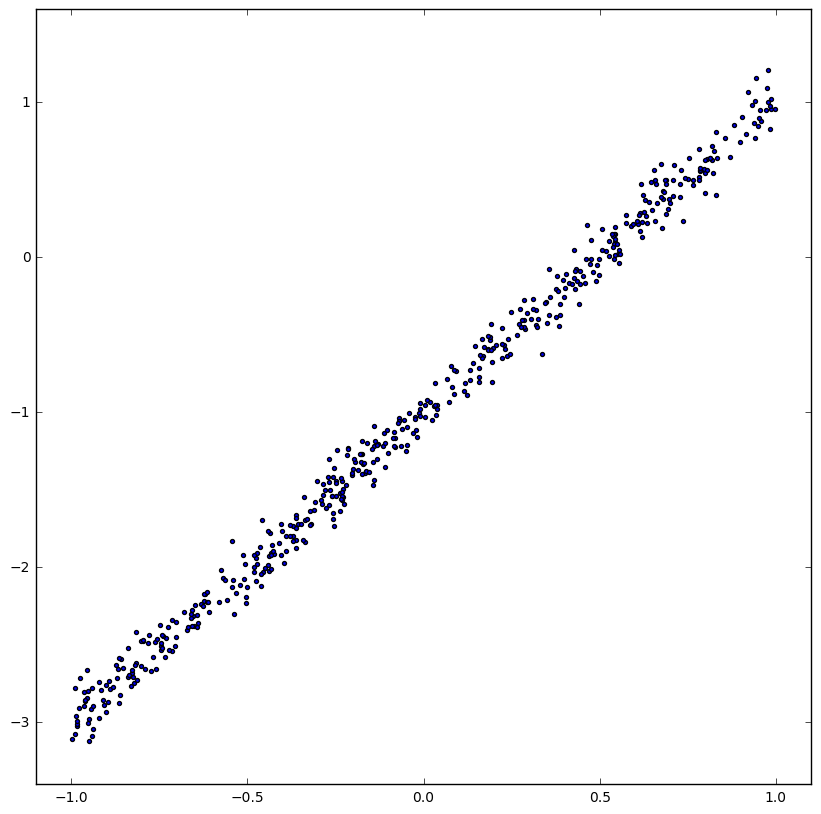

In [36]:
plt.figure(figsize=(10, 10))
plt.xlim(-1.1, 1.1)
plt.ylim(-3.4, 1.6)
plt.scatter(x1, y1, s=8)
plt.show()

## 2. Сгенерируйте массив из 100 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$

In [37]:
x2 = np.random.uniform(-1, 1, 100)
y2 = 0.1*np.random.randn(100) + 1

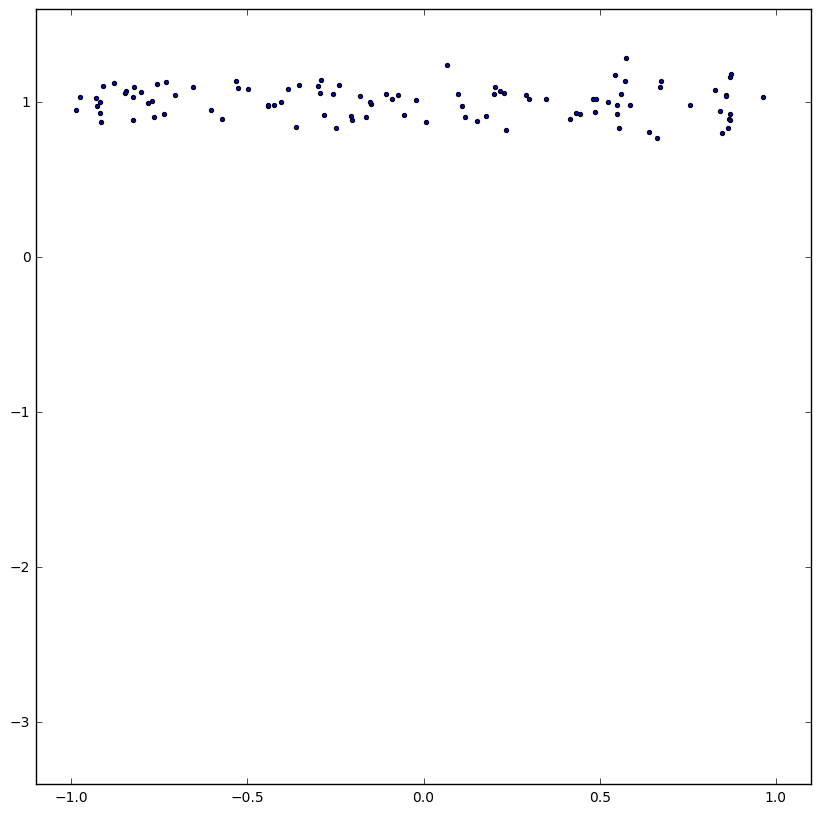

In [38]:
plt.figure(figsize=(10, 10))
plt.xlim(-1.1, 1.1)
plt.ylim(-3.4, 1.6)
plt.scatter(x2, y2, s=8)
plt.show()

## 3. Изобразите первый и второй массив точек на плоскости (используя два разных цвета), а также график функии $f(x) = 2x - 1$ (используя какой-нибудь третий цвет)

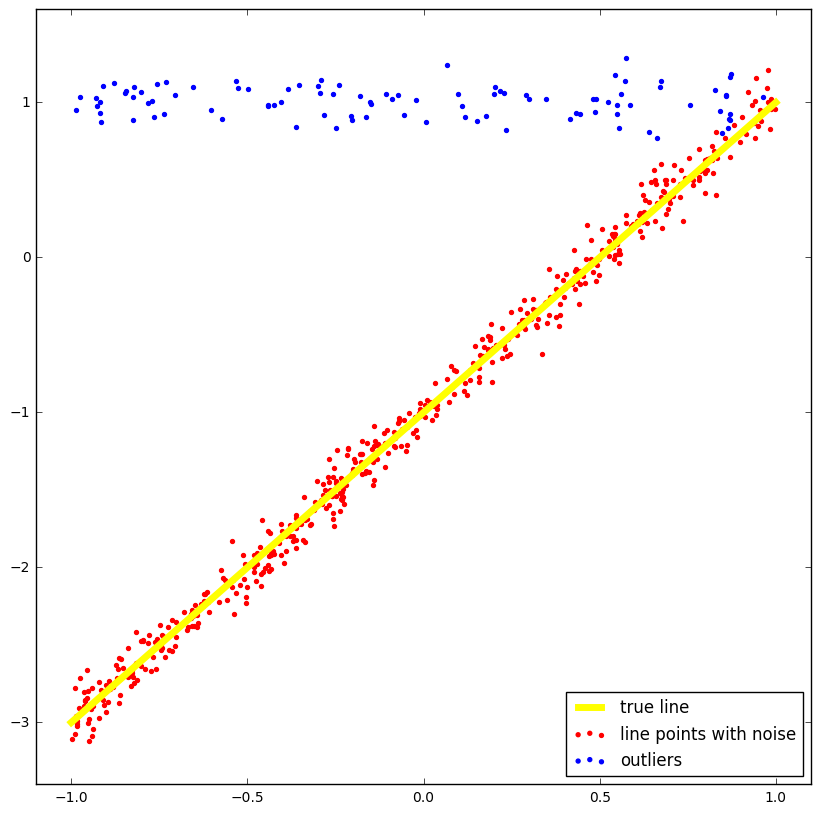

In [40]:
plt.figure(figsize=(10, 10))
plt.xlim(-1.1, 1.1)
plt.ylim(-3.4, 1.6)

x = np.array([-1, 1])
plt.plot(x, f(x), color='yellow', linewidth=5, label='true line')
plt.scatter(x1, y1, color='red', s=8, label='line points with noise')
plt.scatter(x2, y2, color='blue', s=8, label='outliers')

plt.legend(loc=4)
plt.show()

## 4. Решить задачу линейной регрессии

In [41]:
x = np.hstack((x1, x2))
y = np.hstack((y1, y2))

In [42]:
from scipy.optimize import minimize

def MSE(coeffs):
    k, b = coeffs
    return np.mean((k * x + b - y)**2)

coeff = minimize(MSE, [1, 1]).x
print coeff

[ 1.64453295 -0.66135526]


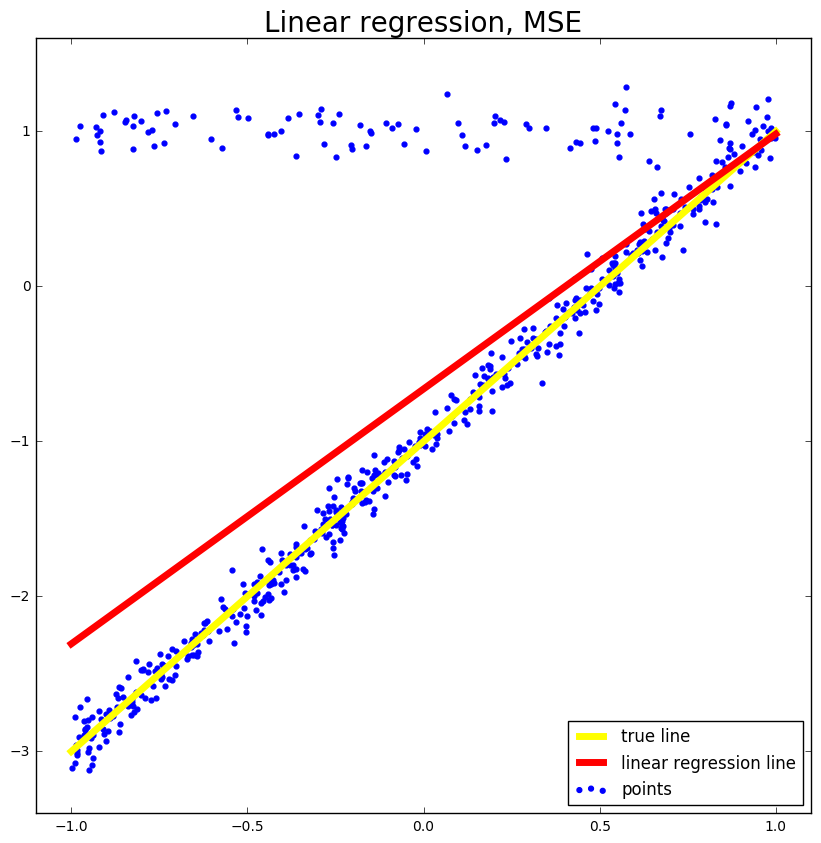

In [43]:
plt.figure(figsize=(10, 10))
plt.xlim(-1.1, 1.1)
plt.ylim(-3.4, 1.6)

x_plot = np.array([-1, 1])
y_plot = coeff[0] * x_plot + coeff[1]

plt.scatter(x, y, color='blue', s=12, label='points')
plt.plot(x_plot, f(x_plot), color='yellow', linewidth=5, label='true line')
plt.plot(x_plot, y_plot, color='red', linewidth=5, label='linear regression line')

plt.title('Linear regression, MSE', fontsize=20)
plt.legend(loc=4)
plt.show()

In [44]:
def MAE(coeffs):
    k, b = coeffs
    return np.mean(abs(k * x + b - y))

coeff = minimize(MAE, [1,1]).x
print coeff

[ 2.0074762 -0.9769441]


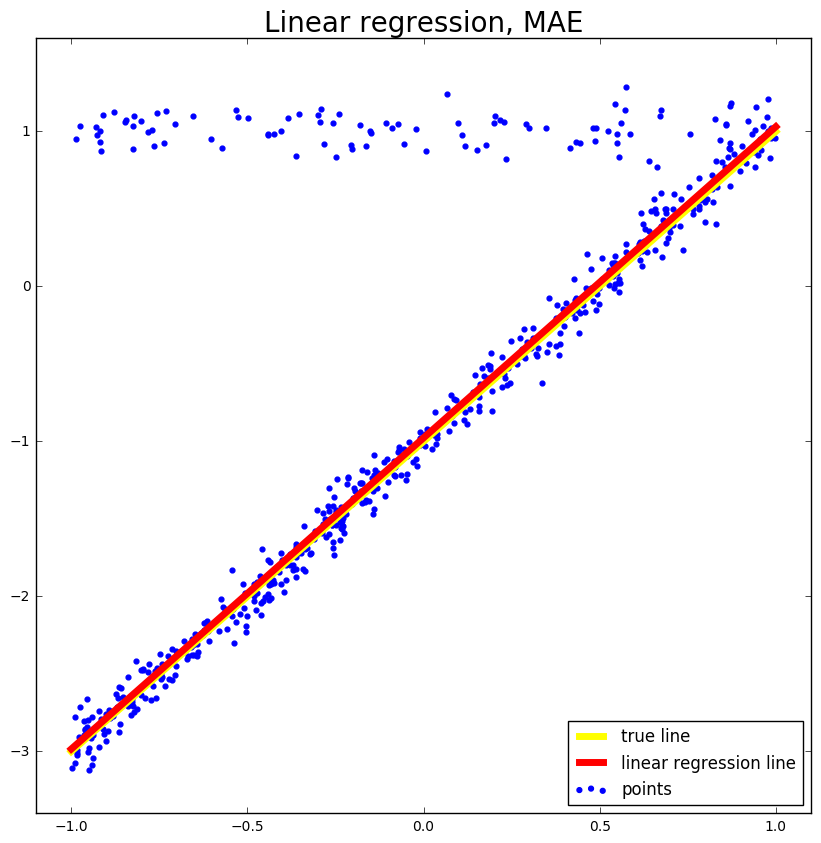

In [45]:
plt.figure(figsize=(10, 10))
plt.xlim(-1.1, 1.1)
plt.ylim(-3.4, 1.6)

x_plot = np.array([-1, 1])
y_plot = coeff[0] * x_plot + coeff[1]

plt.scatter(x, y, color='blue', s=12, label='points')
plt.plot(x_plot, f(x_plot), color='yellow', linewidth=5, label='true line')
plt.plot(x_plot, y_plot, color='red', linewidth=5, label='linear regression line')

plt.title('Linear regression, MAE', fontsize=20)
plt.legend(loc=4)
plt.show()